##ANALISE DE ALGUÉIS - RJ

#Perguntas para a análise:
- Qual o bairro mais caro?
- Qual o bairro mais barato?
- Qual a media do aluguel no RJ?
- Qual o condomínio mais caro?
- Imoveis com areas menores que 40m² tem mais de 1 quarto?
- Apartamentos com suites são mais caros que apartamentos sem suite?

In [ ]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
# Importando os dados
df = pd.read_csv('aluguel.csv',sep=';')

In [336]:
# Apresentando os dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [337]:
# Apresentando informações do dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [338]:
# Verificando dados faltosos
df.isnull().sum().sort_values(ascending=False)

IPTU          10237
Condominio     4093
Valor            17
Area              0
Suites            0
Vagas             0
Quartos           0
Bairro            0
Tipo              0
dtype: int64

In [339]:
# Removendo duplicatas se houver
df.drop_duplicates(keep=False, inplace=True)

In [340]:
# Verificando novamente os dados faltosos
df.isnull().sum().sort_values(ascending=False)

IPTU          9604
Condominio    3830
Valor           17
Area             0
Suites           0
Vagas            0
Quartos          0
Bairro           0
Tipo             0
dtype: int64

In [341]:
# Removendo os valores NaN
df.dropna(inplace=True)

In [342]:
# Apresentando uma amostra do dataset novamente
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [343]:
# Apresentando os tipos de imóveis
df.Tipo.unique()

array(['Quitinete', 'Conjunto Comercial/Sala', 'Apartamento', 'Casa',
       'Loja/Salão', 'Flat', 'Casa de Condomínio', 'Casa Comercial',
       'Casa de Vila', 'Loft', 'Loja Shopping/ Ct Comercial',
       'Galpão/Depósito/Armazém', 'Prédio Inteiro', 'Box/Garagem',
       'Studio', 'Terreno Padrão'], dtype=object)

In [344]:
# Apresentando as quantidades por imóveis
df.Tipo.value_counts()

Apartamento                    13044
Conjunto Comercial/Sala         4157
Casa de Condomínio               646
Quitinete                        526
Loja/Salão                       525
Flat                             367
Loja Shopping/ Ct Comercial      185
Casa                             107
Casa de Vila                      60
Galpão/Depósito/Armazém           59
Loft                              36
Casa Comercial                    25
Prédio Inteiro                    20
Box/Garagem                        5
Studio                             2
Terreno Padrão                     1
Name: Tipo, dtype: int64

In [345]:
# Criando uma lista com o Tipo de imovel que vou trabalhar
tipo_imovel = ['Apartamento']

In [346]:
# Realizando uma selação para pegar somente os Apartamentos
selecao = df['Tipo'].isin(tipo_imovel)
df = df[selecao]
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [347]:
# Reconstruindo o index 
df.reset_index(drop=True, inplace=True)
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
2,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
3,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
4,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
13039,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
13040,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
13041,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
13042,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [348]:
# Realizando um filtro para pegarmos somente apartamentos que estão abaixo de 30K
selecao = (df['Valor'] <= 15000) & (df['Condominio'] <= 5000) & (df['IPTU'] <= 15000)  
df = df[selecao]

In [349]:
# Analisando as estatisticas de Valor do nosso novo dataset
df.Valor.describe().round(2)

count    12431.00
mean      3876.76
std       3008.31
min        400.00
25%       1800.00
50%       2800.00
75%       5000.00
max      15000.00
Name: Valor, dtype: float64

In [351]:
# Criando a coluna Aluguel em nosso dataframe
df['Aluguel'] = (df['Valor']+df['Condominio']+df['IPTU'])
df.head()

<ipython-input-351-c36ff674a452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aluguel'] = (df['Valor']+df['Condominio']+df['IPTU'])


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Aluguel
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
1,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
2,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
3,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
4,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [352]:
# Analisando as estatisticas de Aluguel do nosso novo dataset
df.Aluguel.describe().round(2)

count    12431.00
mean      5606.92
std       4236.50
min        571.00
25%       2652.00
50%       4194.00
75%       7180.50
max      33799.00
Name: Aluguel, dtype: float64

Text(0, 0.5, 'Valores R$')

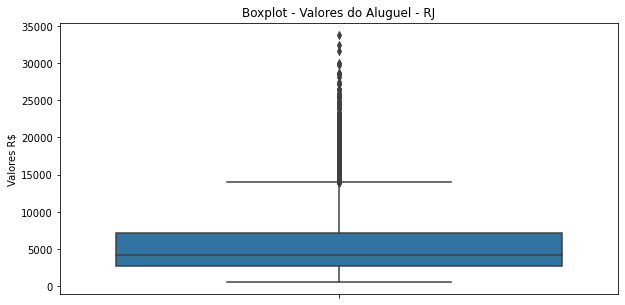

In [353]:
# Apresentação do boxplot dos alugueis
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Aluguel')
plt.title('Boxplot - Valores do Aluguel - RJ')
plt.ylabel('Valores R$')

In [354]:
# Verificando o bairro mais caro
bairro_mais_caro = df[['Bairro', 'Aluguel']].max()
bairro_mais_caro
print(f"O bairro mais carro é o {df['Bairro'].max()} com o valor de R$ {df['Aluguel'].max()}")

O bairro mais carro é o Água Santa com o valor de R$ 33799.0


In [355]:
# Verificando o bairro mais barato
bairro_mais_barato = df[['Bairro','Aluguel']].min()
bairro_mais_barato
print(f"O bairro mais barato é o {df['Bairro'].min()} com o valor de R$ {df['Aluguel'].min()}")

O bairro mais barato é o Abolição com o valor de R$ 571.0


In [356]:
# Verificando a média do aluguel dos bairros analisados
media_aluguel_rj = df[['Bairro','Aluguel']].mean()
media_aluguel_rj

Aluguel    5606.917223
dtype: float64

Text(0.5, 1.0, 'Histograma - Aluguel')

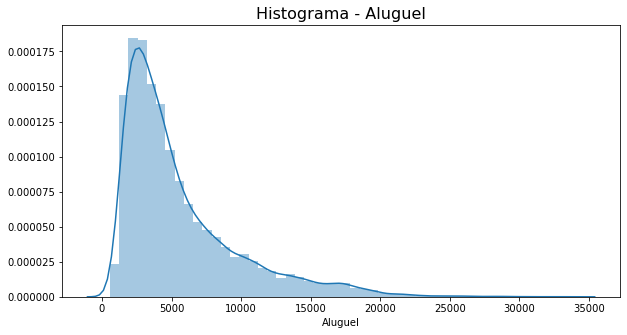

In [379]:
# Apresentação do histograma do Aluguel
plt.figure(figsize=(10,5))
sns.distplot(df['Aluguel'])
plt.title("Histograma - Aluguel", fontsize=16)

In [358]:
# Verificando o condominio mais caro
condominio_mais_caro = df[['Bairro','Condominio']].max()
condominio_mais_caro
print(f"O condominio mais caro é o de {df['Bairro'].max()} com o valor de R$ {df['Condominio'].max()}")

O condominio mais caro é o de Água Santa com o valor de R$ 5000.0


In [359]:
# Verificando o condominio mais barato
condominio_mais_barato = df[['Bairro','Condominio']].min()
condominio_mais_barato
print(f"O condominio mais barato é o de {df['Bairro'].min()} com o valor de R$ {df['Condominio'].min()}")

O condominio mais barato é o de Abolição com o valor de R$ 1.0


#Realizando uma análise de se os apartamentos que tenham menos de 40m² possuem mais de 1 quarto

In [360]:
selecao = (df['Area'] <= 40)
dados_apt = df[selecao]
dados_apt.describe()
print("Apartamentos com area inferior a 40m² em média possui somente 1 quarto.")

Apartamentos com area inferior a 40m² em média possui somente 1 quarto.


#Realizando uma análise de que se os apartamentos que contenham suites são mais caros dos que os que não tem.

In [369]:
# Verificando a quantidade de suites por apartamento
df.Suites.value_counts()

1    5821
0    4730
2    1140
3     464
4     260
5      16
Name: Suites, dtype: int64

Text(0, 0.5, 'Valor do Aluguel R$')

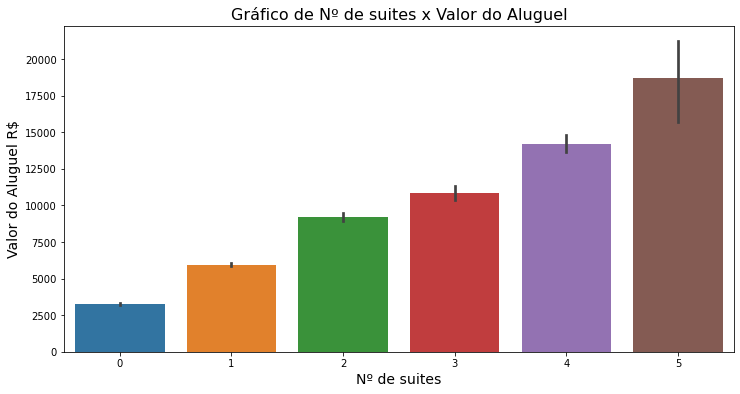

In [377]:
plt.figure(figsize=(12,6))
sns.barplot(x='Suites', y='Aluguel', data=df)
plt.title("Gráfico de Nº de suites x Valor do Aluguel", fontsize=16)
plt.xlabel("Nº de suites", fontsize=14)
plt.ylabel("Valor do Aluguel R$", fontsize=14)